<a href="https://colab.research.google.com/github/johyunkang/python-ml-guide/blob/main/python_ml_perfect_guide_07_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 07 군집화


### 01 K-평균 알고리즘 이해
K-평균 군집 중심점(Centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

![k-mean-clustering](https://user-images.githubusercontent.com/291782/142011995-c697fbde-af31-4f40-8c27-994fc3addb18.png)

K-평균의 장점
- 일반적인 군집화에서 가장 많이 활용되는 알고리즘
- 알고리즘이 쉽고 간결  

&nbsp;  
K-평균의 단점
- 거리기반 알고리즘으로 속성의 개수가 매무 많을 경우 군집화 정확도가 떨어짐. (이를 위해 PCA로 차원감소 필요 할 수도 있음)
- 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
- 몇 개의 군집(cluster)을 선택해야 할지 가이드하기가 어려움

##### 사이킷런 Kmeans 클래스 소개

In [ ]:
class sklearn.cluster.KMeans(n_cluster=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
                             precompute_distances='auto', verbose=0, random_state=None,
                             copy_x=True, n_jobs=1, algorithm='auto')

이 중 중요한 파라미터는 아래와 같음.  
- KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이며, 이는 군집화할 개수, 즉 군집 중심점의 개수를 의미함.
- init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정함.
- max_iter는 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료합니다.

&nbsp;  

KMeans 는 fit(데이터세트) 또는 fit_transform(데이터세트) 메서드를 이용해 수행하면 됨.  
다음은 주요 속성 정보
- labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
- cluster_centers_ : 각 군집 중심점 좌표 (shape는 [군집 개수, 피처 개수]). 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음.


##### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
print(type(iris))
print(iris.data[:10])
# 더 편리한 데이터 핸들링을 위해 DF로 변환
irisdf = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisdf.head()

<class 'sklearn.utils.Bunch'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# 붓꽃 데이터 세트를 3 그룹(n_cluster=3)으로 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisdf)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


labels_ 의 값이 0,1, 2로 되어 있으며 이는 각 레코드가 첫 번째 군집, 두번째 군집, 세번째 군집에 속함을 의미

In [4]:
# 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인하겠음
irisdf['target'] = iris.target
irisdf['cluster'] = kmeans.labels_
iris_result = irisdf.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


- 분류 타겟 0 값인 데이터는 1번 군집으로 모두 잘 그룹핑 됨
- 분류 타겟 1 값인 데이터는 2개만 2번 군집, 나머지 48개는 모두 0번 군집으로 그룹핑 되었음.
- 하지만 분류 타겟이 2 값인 데이터는 0번 군집으로 14개, 2번 군집으로 36개가 분산되어 그룹핑 됨.

In [5]:
# 군집화 시각화
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisdf['pca_x'] = pca_transformed[:, 0]
irisdf['pca_y'] = pca_transformed[:, 1]
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


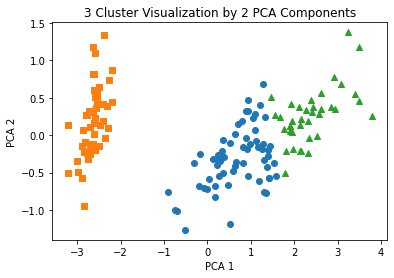

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisdf[irisdf['cluster'] == 0].index
marker1_ind = irisdf[irisdf['cluster'] == 1].index
marker2_ind = irisdf[irisdf['cluster'] == 2].index

# 군집 값이 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커표시
plt.scatter(x=irisdf.loc[marker0_ind, 'pca_x'], y=irisdf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisdf.loc[marker1_ind, 'pca_x'], y=irisdf.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisdf.loc[marker2_ind, 'pca_x'], y=irisdf.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()

- Cluster 1을 나타내는 네모(square, s)는 명확히 다른 군집과 잘 분리돼 있음
- Cluster 0을 나타내는 동그라미('o')와 Cluster 2를 나타내는 세모('^')는 상당수준 분리되어 있지만, 네모만큼 명확하지는 않음.

##### 군집화 알고리즘 테스트를 위한 데이터 생성

make_blobs() 의 간략한 사용법을 알아보자.  
make_blobs()를 호출하면 피처 데이터 세트와 타깃 데이터 세트가 튜플(Tuple)로 반환 됨.  
make_blobs() 의 호출 파라미터는 다음과 같음  
- n_samples : 생성할 총 데이터 개수. 디폴트는 100개.
- n_features : 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정 해 보통 첫 번째는 X 좌표, 두 번째 피처는 Y 좌표상에 표현
- centers : int 값. 예를 들어 3으로 설정하면 군집의 개수를 나타냄. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미
- cluster_std : 생성될 군집 데이터의 표준 편차를 의미함. 만일 float 값 0.8로 지정하면 군집 내에서 데이터가 표준편차 0.8을 가진 값으로 만들어짐. [0.8, 1.2, 0.6] 과 같은 형태로 표현하면 첫번째 군집 내 데이터의 표준편차는 0.8, 두번째는 1.2 표준편차 데이터 형태로 만들어짐. 군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용.

X, y = make_blobs(n_samples=200, n_features=2, centers=3, random_state=0)을 호출하면 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 동시에 3개의 군집화 값을 가진 타깃 데이터 세트 y가 반환 됨.

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


좀 더 데이터 가공을 편히라게 하기 위해 위 데이터 세트를 DF로 변경하겠음.  
피처 이름은 ftr1, ftr2

In [8]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


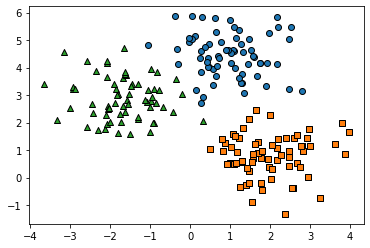

In [9]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target=0, target=1, target=2 로 scatter plot을 marker 별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

plt.show()

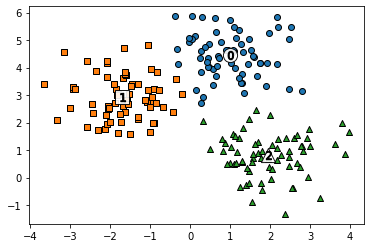

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


In [10]:
# KMeans 객체를 이용해 X 데이터를 Kmeans 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels
# kmeans_label : 군집번호를 의미

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2']
                , edgecolor='k', marker=markers[label])
    
    # 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % label)
    
plt.show()

print(clusterDF.groupby('target')['kmeans_label'].value_counts())

### 02 군집평가 (Cluster Evaluation)



##### 실루엣분석의 개요 (silhouette analysis)

실루엣 분석은 실루엣 계수 (silhoutte coefficient)를 기반으로 함
실루엣 계수는 개별 데이터가 가지는 군집화 지표
효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미.
*이탤릭체 텍스트*
실루엣 계수값 s(i) = $ \dfrac {(b(i) - a(i))} {max(a(i), b(i))} , \quad -1 \le s(i) \le 1$

실루엣 계수는 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울수록 근처 군집과 가까워진다는 것임


마이너스(-) 값은 아예 다른 군집에 데이터 포인트가 할당됐음을 뜻함.

##### 좋은 군집화의 기준
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhoutte_score() 값은 0 ~ 1 상이의 값을 가지며, 1에 가까울수록 좋습니다.

2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별군집의 실루엣 계수 평균값이 
전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함. 만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만
유난히 높고 다른 군집들의 계수 평균값은 낮으면 좋은 군집화 조건이 아님

##### 붓꽃 데이터 세트를 이용한 군집평가

In [11]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
isisdf = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisdf)
irisdf['cluster'] = kmeans.labels_


# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisdf['cluster'])
print('silhouette_samples() return 값의 shape ', score_samples.shape)

# irisdf 실루엣 계수 컬럼 추가
irisdf['silhouette_coeff'] = score_samples
# print(score_samples)

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisdf['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis score:{0:.3f}'.format(average_score))

irisdf.groupby('cluster')['silhouette_coeff'].mean()

# p.423 부터

silhouette_samples() return 값의 shape  (150,)
붓꽃 데이터 세트 Silhouette Analysis score:0.553


cluster
0    0.798140
1    0.417320
2    0.451105
Name: silhouette_coeff, dtype: float64

##### visualize_silhouette()
- 부록 소스코드
- 출처 : https://github.com/wikibook/pymldg-rev/blob/master/7%EC%9E%A5/7-2_Cluster%20evaluation.ipynb
- 사용법
 ```python
 # 피처 데이터 세트 X_features에 대해 군집이 2, 3, 4, 5,개일 때 군집별 평균 실루엣 계수 값을 알고 싶을 때
 visualize_silhouette([2, 3, 4, 5], X_features)
 ```


In [12]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

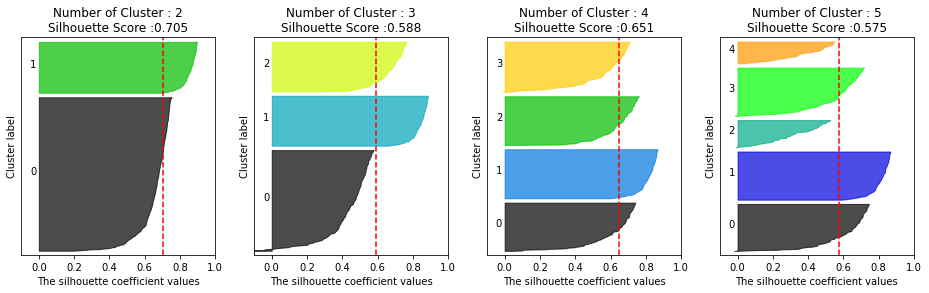

In [13]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2,3, 4, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], x)

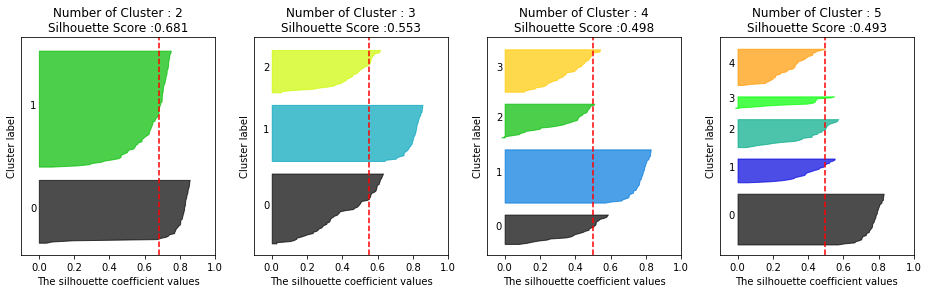

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()

visualize_silhouette([2, 3, 4, 5], iris.data)

### 03 평균 이동 (Mean Shift)

- 확률밀도함수 (probability density function)
- KDE (Kernel Density Estimation)

In [15]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


위 코드 실행 결과 군집이 0 ~ 5까지 6개로 분류. 지나치게 세분화되어 군집화되었음

일반적으로 bandwidth 값을 작게 할수록 군집 개수가 많아짐.

이번에는 bandwidth를 살짝 높인 1.0 으로 해서 MeanShift를 수행해 보겠음

In [16]:
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개의 군집으로 잘 군집화 되었음

MeanShift에서는 bandwidth를 최적화값으로 설정하는 것이 매우 중요.

사이킷런은 최적화된 bandwidth 값을 찾기 위해 **estimate_bandwidth()** 함수 제공

In [17]:
from sklearn.cluster import estimate_bandwidth

# estimate_bandwidth(): 최적화된 bandwidth 값 반환
bandwidth = estimate_bandwidth(x)
print('최적 bandwidth 값:', round(bandwidth, 3))

최적 bandwidth 값: 1.816


In [18]:
import pandas as pd

clusterDF = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(x)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(x)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


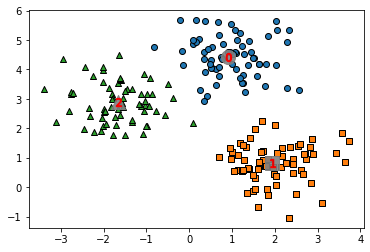

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels :
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s=200, color='gray', alpha=0.9,
                marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='red', marker='$%d$' % label)
    
plt.show()

In [20]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때문에 좀 더 유연한 군집화가 가능한 것임.

또한 이상치의 영향력도 크지 않고, 미리 군집의 개수를 정할 필요도 없음

하지만 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 bandwidth 의 크기에 따른 군집화 영향도가 매우 큼

### GMM (Gaussian Mixture Model)

- GMM 은 데이터 여러 개의 가우시안 분포가 섞인 것으로 간주
- GMM의 모수 추정은 아래 2가지를 추정하는 것
    - 개별 정규 분포의 평균과 분산
    - 각 데이터가 어떤 정규 분포에 해당하는지의 확률


- 모수 추정을 위해 GMM은 EM (Expectation and Maximization) 방법을 적용

GMM을 이용한 붓꽃 데이터 세트 군집화

In [21]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DF로 변환
irisdf = pd.DataFrame(data=iris.data, columns=feature_names)
irisdf['target'] = iris.target

- GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components
> n_components 는 gaussian mixture의 모델의 총 개수



In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisdf 의 'gmm_clustr' 컬럼 명으로 저장
irisdf['gmm_cluster'] = gmm_cluster_labels
irisdf['target'] = iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisdf.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- 결과 해석
``` python
target  gmm_cluster
0       0              50
1       2              45
          1               5
2       1              50
```


- target 0은 cluster 0으로, target 2는 cluster 1로 모두 잘 매핑됨
- target 1만 cluster 2로 45개 (90%), cluster 1로 5개 (10%) 매핑됨
- 앞 절의 K-평균 군집화 결과보다 더 효과적인 분류 결과가 도출 됨
- 이는 어떤 알고리즘이 더 뛰어나다는 것이 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미

#### GMM과 K-평균의 비교

- 앞으로도 군집을 자주 시각화 하므로 이를 위한 별도의 함수를 만들어 사용
- visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True)
    - clusterobj : 사이킷런의 군집 수행 객체. KMeans 나 GausianMixture의 fit() 와 predict()로 군집화를 완료한 객체. 만약 군집의 결과 시각화가 아니고 make_blobs()로 생성한 데이터의 시각화일 경우 None 입력
    - dataframe : 피처 데이터 세트와 label 값을 가진 DF
    - label_name : 군집화 결과 시각화일 경우 DF 내의 군집화 label 컬럼명. make_blobs() 결과 시각화일 경우는 DF 내의 target 컬럼명
    - iscenter : 사이킷런 cluster 객체가 군집 중심 좌표를 제공하면 True, 아니면 False
- 출처 : https://github.com/wikibook/pymldg-rev/blob/master/7%EC%9E%A5/7-4_Gaussian_Mixture_Model.ipynb

In [23]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

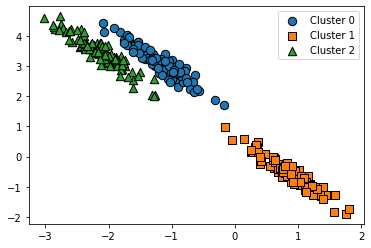

In [24]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
x, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
x_aniso = np.dot(x, transformation)

# feature 데이터 세트와 make_blobs()의 y 결과값을 DF 로 저장
clusterdf = pd.DataFrame(data=x_aniso, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y

# 생성된 데이터 세트를 target 별로 다른 마커로 표시해 시각화
visualize_cluster_plot(None, clusterdf, 'target', iscenter=False)

- 위와 같이 타원형으로 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어지게 됨
- KMeans 가 어떻게 군집화 하는지 확인해 보겠음

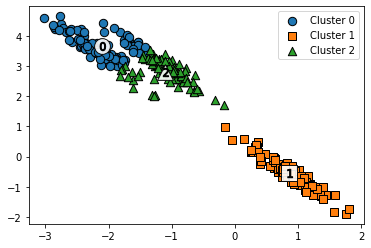

In [25]:
# 3개의 군집 기반 KMeans를 x_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(x_aniso)
clusterdf['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterdf, 'kmeans_label', iscenter=True)

- KMeans 는 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있음

- 이번에는 GMM 군집화 수행

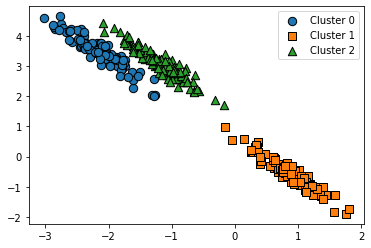

In [26]:
# 3개의 n_components 기반 GMM을 x_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(x_aniso).predict(x_aniso)
clusterdf['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정
visualize_cluster_plot(gmm, clusterdf, 'gmm_label', iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화되었음을 알 수 있음
- KMeans, GMM 군집 값을 비교해 얼마만큼의 효율 차이가 발생하는지 확인해 보겠음

In [27]:
print('### KMeans Clustering ###')
print(clusterdf.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterdf.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- KMeans 는 1번만 정확히 매핑, GMMM은 군집과 target이 잘 매핑됨

### 05 DBSCAN

**DBSCAN**의 가장 중요한 두 가지 파라미터는 **입실론(epsilon)**으로 표기하는 주변 영역과 이 입실론 주변 영역에 포함되는 최소 데이터의 개수 **min points** 임

- 입실론 주변 영역(epsilon) : 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
- 최소 데이터 개수 (min points) : 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수


입실론 주변 영역 내에 포함되는 최소 데이터 개수를 충족시키는가 아닌가에 따라 데이터 포인트를 다음과 같이 정의
- 핵심 포인트 (core point) : 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우 해당 데이터를 핵심 포인트라고 함
- 이웃 포인트 (Neighbor Point) : 주변 영역 내에 위치한 타 데이터를 이웃 포인트라고 함
- 경계 포인트 (Border Point) : 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않지만, 핵심 포인트를 이웃 포인트로 가지고 있는 데이터를 경계 포인트라고 함
- 잡음 포인트 (Noise Point) : 최소 데이터 개수 이상의 이웃 포인트를 가지고 있지 않으며, 핵심 포인트도 이웃 포인트로 가지고 있지 않는 데이터를 잡음 포인트라고 함

#### DBSCAN 적용하기 - 붓꽃 데이터 세트

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


- 위 결과에서 군집 레이블이 -1인 것은 노이즈에 속하는 군집을 의미
- 따라서 위 DBSCAN에서 **0과 1 두 개의 군집**으로 군집화됐음
- Target 값의 유형이 3가지 인데, 군집이 2개가 됐다고 군집화 효율이 떨어진다는 의미는 아님

- PCA를 이용해 2개의 피처로 압축 변환한 뒤, 앞 예제에서 사용한 visualize_cluster_plot() 함수를 이용해 시각화 해 보겠음

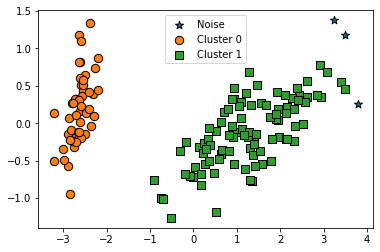

In [32]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_components=2 로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# visualize_cluster_2d() 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisdf['ftr1'] = pca_transformed[:, 0]
irisdf['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)


- 별표로 표현된 값은 모두 노이즈




- eps를 기존의 0.6 에서 0.8로 증가시키면 노이즈 데이터 수가 줄어듬

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


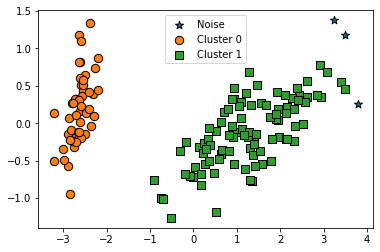

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

# 아래 함수 공식 레포에서 받아서 정의해라. p.447
visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

- 노이즈 군집인 -1이 3개 밖에 없음
- eps가 0.6일 떄 노이즈로 분류된 데이터 세트는 eps 반경이 커지면서 cluster 1에 소속됐음
- 이번에는 eps를 기존 0.6으로 유지하고 min_samples를 16으로 늘려 보겠음

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


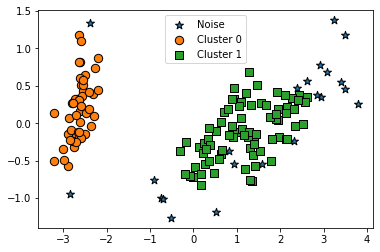

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

# 아래 함수 공식 레포에서 받아서 정의해라. p.447
visualize_cluster_plot(dbscan, irisdf, 'dbscan_cluster', iscenter=False)

- 노이즈 데이터가 기존보다 많이 증가함을 알 수 있음

#### DBSCAN 적용하기 - make_circles() 데이터 세트

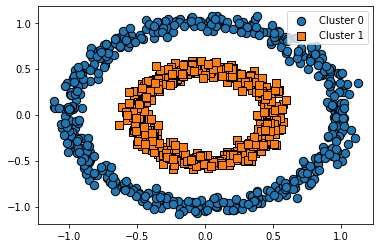

In [36]:
from sklearn.datasets import make_circles

# noise 는 노이즈 데이터 세트 비율, factor는 외부원과 내부원의 scale 비율
x, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

clusterdf = pd.DataFrame(data=x, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y

visualize_cluster_plot(None, clusterdf, 'target', iscenter=False)

- K-평균으로 make_circles() 데이터 세트 군집화

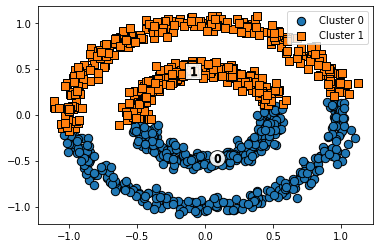

In [39]:
# KMeans로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(x)
clusterdf['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterdf, 'kmeans_cluster', iscenter=True)

- KMeans를 사용하니 위 아래 절반으로 군집화 되어씀
- 거리기반 군집화로는 위와 같이 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어려움
- 다음은 GMM 적용

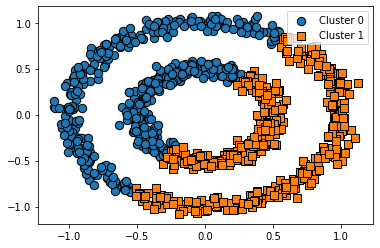

In [41]:
# GMM으로 make_circles() 데이터 세트 군집화
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(x).predict(x)
clusterdf['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterdf, 'gmm_cluster', iscenter=False)

- GMM도 효과적인 군집화가 안 이루어짐
- 다음은 DBSCAN

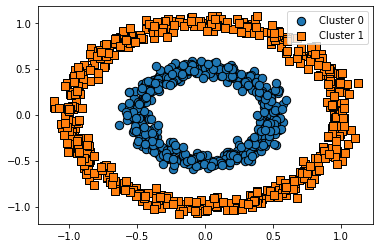

In [42]:
# DBSCAN으로 make_circles() 데이터 세트 군집화
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(x)
clusterdf['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterdf, 'dbscan_cluster', iscenter=False)